# Precision-landing of a Parrot drone 

This tutorial describes the precision control of a Parrot drone to perform a precision landing, the drone is roughly 30\*30cm and should land in a 60\*60cm area.

# System description

# 1. QR code detection

# 2. Drone control in ideal case


# 3. Drone control in real situation - study of the impact of delay and losses


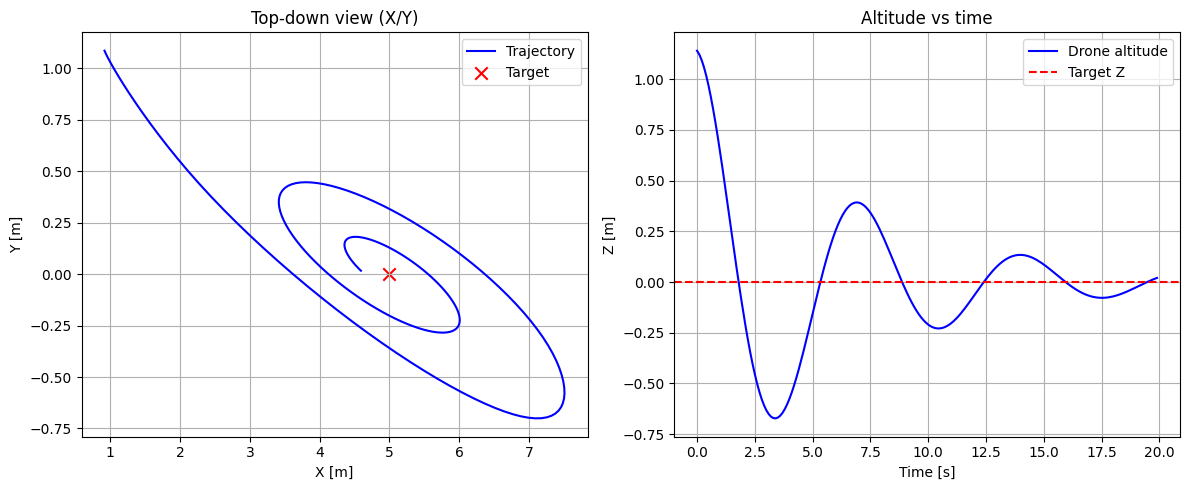

In [1]:
from DroneEnv import DroneLandingEnv, plot_xy_z,plot_trajectory_3d
from PIDCon import PIDController
import numpy as np

# --- Simulation with PID ---
env = DroneLandingEnv(render_mode=None)
obs, info = env.reset(init_pos=np.array([1.0, 1.0, 1.0]))
done = False
states = []

# Example PID gains (tune these!)
pid = PIDController(Kp=[0.5,0.5,0.8], Ki=[0.0,0.0,0.0], Kd=[0.2,0.2,0.3], dt=env.dt, integral_limit=0.5, z_fixed_speed= None)

while not done:
    pos = obs[:3]
    vel = obs[3:]
    error = env.target - pos

    # Compute PID action
    action = pid.compute(error)

    obs, reward, terminated, truncated, info = env.step(action)
    states.append(obs.copy())
    done = terminated or truncated

env.close()

states = np.array(states)
x, y, z = states[:,0], states[:,1], states[:,2]
target = env.target

# --- Plot results ---
plot_trajectory_3d(x, y, z, target)
plot_xy_z(x, y, z, target, env.dt)
